#### Import Section

In [ ]:
import gensim

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sqlite3
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

import re
import nltk
from nltk.corpus import stopwords

#### Reading the data

In [18]:
conn = sqlite3.connect('database.sqlite')

In [19]:
filtered_data=pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3
""",conn)

conn.close()
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


* ratings below 3 are considered as negative and ratings above 3 are considered as positive.

In [20]:
def partition(x):
    if(x<3):
        return 'negative'
    else:
        return 'positive'

In [21]:
filtered_data['Score']=filtered_data['Score'].map(partition)

* Sorting on the basis of Product ID

In [22]:
sorted_data=filtered_data.sort_values('ProductId')

In [23]:
final=sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'})
final

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...
138693,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,positive,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci..."
138694,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,positive,1338249600,Must have.,I set aside at least an hour each day to read ...
138695,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,positive,1325721600,A classic,I remembered this book from my childhood and g...
138696,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,positive,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....
138697,150515,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,positive,1303171200,One of our family's favorite books,This book is a family favorite and was read to...


In [24]:
final.shape

(364173, 10)

In [25]:
final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...
138693,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,positive,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci..."
138694,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,positive,1338249600,Must have.,I set aside at least an hour each day to read ...
138695,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,positive,1325721600,A classic,I remembered this book from my childhood and g...
138696,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,positive,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....
138697,150515,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,positive,1303171200,One of our family's favorite books,This book is a family favorite and was read to...


In [26]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
final.shape

(364171, 10)

In [27]:
final['Score'].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

In [29]:
conn=sqlite3.connect('Reviews.sqlite')
c=conn.cursor()
final.to_sql('Reviews',conn,if_exists='replace')
conn.close()

In [3]:
conn = sqlite3.connect('Reviews.sqlite')
final= pd.read_sql_query("""SELECT * FROM Reviews""",conn)
conn.close()
final.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...


### Data Cleaning.

* Applying Bag of words and tf_idf on text reviews.

In [4]:
bow_vec=CountVectorizer()
bow = bow_vec.fit_transform(final['Text'].values)

In [4]:
bow.get_shape()

(364171, 115281)

In [5]:
tf_idf_vec=TfidfVectorizer()
tf_idf=tf_idf_vec.fit_transform(final['Text'].values)
tf_idf.shape

(364171, 115281)

In [6]:
stop=set(stopwords.words('english'))
print(stop)

{'on', 've', 'been', 'being', 'where', "couldn't", 'wasn', "shan't", "haven't", 'doing', 'be', 'during', 'wouldn', 'both', "don't", 'ma', 'under', "should've", 'now', 'off', "doesn't", 'most', 'there', "you're", 'after', 'the', 'above', 'just', 'didn', "hasn't", "shouldn't", 'that', 'these', 'couldn', 'by', 'theirs', "aren't", 'had', 'own', 'hadn', 'their', 'as', 'which', 'all', 'mustn', 'we', 'if', "mustn't", 'for', 'from', 'an', 'when', 'what', 'then', 'y', 'here', 're', 'am', 'shouldn', 'so', 'have', 'with', 'his', 'until', 'of', 'further', 'hasn', 'her', 'herself', 'than', 'only', 'they', 'will', "it's", 'and', "you've", 'it', 'yourself', "needn't", 'mightn', 'shan', "isn't", 'whom', 'my', 'm', 'yourselves', 'once', 'themselves', 'into', 'your', 'our', 'you', 'a', 'before', 'more', 'nor', 'don', 'but', 'while', 'its', 'some', 'because', 'myself', 'she', 'or', "that'll", 'd', 'o', "you'll", 'them', "won't", 'isn', 'no', 'few', 'can', "weren't", 'has', 'aren', 'against', 'other', 'ne

In [16]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

* Removing these exceptions

In [7]:
lst=['won','nor','not','against']
for word in lst:
    stop.remove(word)
print(stop)

{'on', 've', 'been', 'being', 'where', "couldn't", 'wasn', "shan't", "haven't", 'doing', 'be', 'during', 'wouldn', 'both', "don't", 'ma', 'under', "should've", 'now', 'off', "doesn't", 'most', 'there', "you're", 'after', 'the', 'above', 'just', 'didn', "hasn't", "shouldn't", 'that', 'these', 'couldn', 'by', 'theirs', "aren't", 'had', 'own', 'hadn', 'their', 'as', 'which', 'all', 'mustn', 'we', 'if', "mustn't", 'for', 'from', 'an', 'when', 'what', 'then', 'y', 'here', 're', 'am', 'shouldn', 'so', 'have', 'with', 'his', 'until', 'of', 'further', 'hasn', 'her', 'herself', 'than', 'only', 'they', 'will', "it's", 'and', "you've", 'it', 'yourself', "needn't", 'mightn', 'shan', "isn't", 'whom', 'my', 'm', 'yourselves', 'once', 'themselves', 'into', 'your', 'our', 'you', 'a', 'before', 'more', 'don', 'but', 'while', 'its', 'some', 'because', 'myself', 'she', 'or', "that'll", 'd', 'o', "you'll", 'them', "won't", 'isn', 'no', 'few', 'can', "weren't", 'has', 'aren', 'other', 'needn', 'weren', "wa

In [8]:
sno=nltk.stem.SnowballStemmer('english')

* Removing HTML codes from the data

In [9]:
def cleanhtml(sentence):
    cleanr=re.compile('<.*?>')
    cleantext=re.sub(cleanr,' ',sentence)
    return cleantext

* Removing punctuations from the data

In [10]:
def cleanpunc(sentence):
    '''This function cleans all the punctuation or special characters from a given sentence'''
    cleaned = re.sub(r'[?|@|!|^|%|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [13]:
def preprocessing(series):
    i=0
    str1=" "
    final_string=[]
    list_of_sent=[]
    all_positive_words=[]
    all_negative_words=[]
    
    for sent in series.values:
        filtered_sent=[]
        list_of_sent=[]
        sent=cleanhtml(sent)
        sent=cleanpunc(sent)
        for cleaned_words in sent.split():
             if((cleaned_words.isalpha()) & (len(cleaned_words) > 2)):
                    if(cleaned_words.lower() not in stop):
                        s = (sno.stem(cleaned_words.lower()))
                        filtered_sent.append(s)    
                        if (final['Score'].values)[i] == 'positive':
                            all_positive_words.append(s)
                        if(final['Score'].values)[i] == 'negative':
                            all_negative_words.append(s)
        list_of_sent.append(filtered_sent)
        str1 = " ".join(filtered_sent)
        final_string.append(str1)
        i += 1
    return final_string, list_of_sent    

In [14]:
final_string,list_of_sent=preprocessing(final['Text'])

In [15]:
final['CleanedText']=final_string

#### Saving the cleaned data to Sqlite database

In [56]:
conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
final.to_sql('Reviews', conn, if_exists='replace')
conn.close()

In [3]:
conn = sqlite3.connect('sorted_final.sqlite')
c=conn.cursor()
final= pd.read_sql_query("""SELECT * FROM Reviews""",conn)
conn.close()
final.head()

,index,level_0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,0,0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,19,19,150526,0006641040,A3E9QZFE9KXH8J,R. Mitchell,11,18,0,1129507200,awesome book poor size,This is one of the best children's books ever ...,one best children book ever written mini versi...
2,20,20,150529,0006641040,A25ACLV5KPB4W,"Matt Hetling ""Matt""",0,1,1,1108425600,"Nice cadence, catchy rhymes",In June<br />I saw a charming group<br />of ro...,june saw charm group rose begin droop pep chic...
3,21,21,150517,0006641040,ABW4IC5G5G8B5,kevin clark,0,0,1,1291075200,good for children,"Classic children's book, can't go wrong. I rea...",classic children book cant wrong read kid orde...
4,22,22,150504,0006641040,AQEYF1AXARWJZ,"Les Sinclair ""book maven""",1,1,1,1212278400,Chicken Soup with Rice,A very entertaining rhyming story--cleaver and...,entertain rhyme catchi illustr imagin fit righ...


### Data Visualization

#### Applying Bag of words on cleaned data

In [3]:
bow_vect = CountVectorizer()
bow = bow_vect.fit_transform(final['CleanedText'].values)
bow.shape

(364171, 71691)

In [6]:
final['Score'][:1000].value_counts()

positive    831
negative    169
Name: Score, dtype: int64

* visualizing first 1000 reviews using Bag of Words TSNE

In [5]:
X = bow[:1000, :].toarray()
type(X)

numpy.ndarray

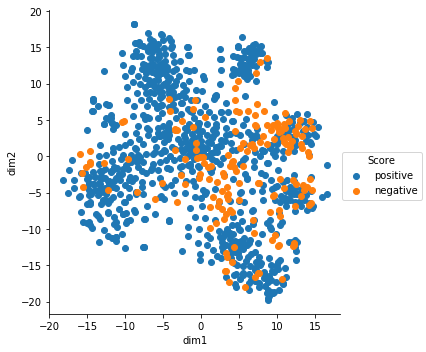

In [6]:
tsne = TSNE(n_components = 2, perplexity = 25).fit_transform(X)
df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, final['Score'].iloc[:1000]], axis = 1)
sns.FacetGrid(df, hue = 'Score', size = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()

* Visualizing first 3000 review points using Bag of Words TSNE

In [7]:
X = bow[:3000, :].toarray()
type(X)

numpy.ndarray

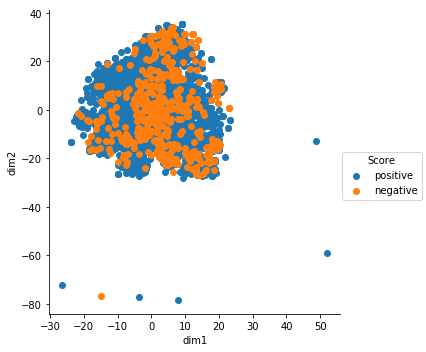

In [8]:
tsne = TSNE(n_components = 2, perplexity = 30).fit_transform(X)
df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, final['Score'].iloc[:3000]], axis = 1)
sns.FacetGrid(df, hue = 'Score', size = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()

* Visualizing first 1000 review points using tf_idf and TSNE

In [3]:
tf_idf_vect=TfidfVectorizer()
tf_idf=tf_idf_vect.fit_transform(final['CleanedText'].values)
tf_idf.shape

(364171, 71691)

In [8]:
Y = tf_idf[:1000, :].toarray()
type(Y)

numpy.ndarray

In [9]:
tsne=TSNE(n_components=2,perplexity=25).fit_transform(Y)

AttributeError: 'Series' object has no attribute 'iLoc'

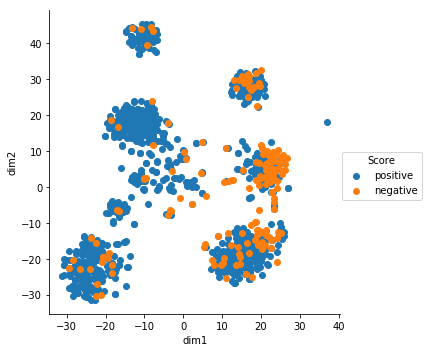

In [10]:
df=pd.DataFrame(tsne,columns=('dim1','dim2'))
df=pd.concat([df,final['Score'].iloc[:1000]],axis=1)
sns.FacetGrid(df,hue='Score',size=5).map(plt.scatter,'dim1','dim2').add_legend()

In [11]:
del Y

* Visualizing first 3000 review points using tf_idf and TSNE

In [12]:
Y = tf_idf[:3000, :].toarray()
type(Y)

numpy.ndarray

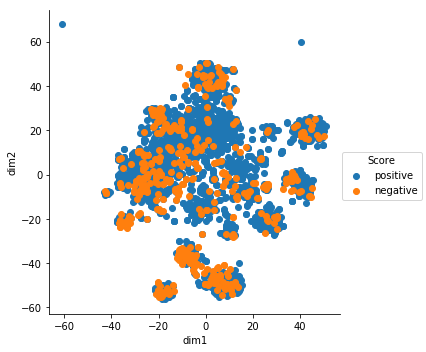

In [13]:
tsne = TSNE(n_components = 2, perplexity = 30).fit_transform(Y)
df = pd.DataFrame(tsne, columns = ('dim1', 'dim2'))
df = pd.concat([df, final['Score'].iloc[:3000]], axis = 1)
sns.FacetGrid(df, hue = 'Score', size = 5).map(plt.scatter, 'dim1', 'dim2').add_legend()

* Loading list of sent reviews from pickle file

In [5]:
with open('list_of_sent_for_input_to_w2v.pkl', 'rb') as pickle_file:
    list_of_sent = pickle.load(pickle_file)

In [5]:
final['CleanedText'][0]

'witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg'

In [6]:
list_of_sent[0]

['witti',
 'littl',
 'book',
 'make',
 'son',
 'laugh',
 'loud',
 'recit',
 'car',
 'drive',
 'along',
 'alway',
 'sing',
 'refrain',
 'hes',
 'learn',
 'whale',
 'india',
 'droop',
 'love',
 'new',
 'word',
 'book',
 'introduc',
 'silli',
 'classic',
 'book',
 'will',
 'bet',
 'son',
 'still',
 'abl',
 'recit',
 'memori',
 'colleg']

#### Applying Word2Vec on given review points

In [6]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [7]:
def calc_avg_w2v(list_of_sent, w2v_model):
      
    sent_vectors = []
    for sent in list_of_sent:
        sent_vec = np.zeros(50)
        cnt_words = 0
        for word in sent:
            try:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
            except:
                pass
        sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    return sent_vectors

In [9]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [9]:
from sklearn.utils import shuffle

In [10]:
final = shuffle(final, random_state=123)
final.head()

,index,level_0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
253564,253564,253564,540125,B002W08W56,A2STPOZAT37RNE,Betty Baker,1,1,1,1300320000,"Wonderful, but surprised to find this size can...",Great beans....the best texture hands down. T...,great bean best textur hand seem great tast do...
123620,123622,123622,31761,B000UXWQMC,A3AKMRCK9C8KWO,Traveller,3,4,1,1263686400,Better than store bought,We bought the Roland Kalamata Halves (Barchett...,bought roland kalamata halv barchetta recent e...
111670,111682,111682,509496,B000P09RJA,A29WSMQQ9WTM7E,Kari Carper,0,0,1,1286496000,Better than a regular granola bar,These bars are very tasty (as are the chocolat...,bar tasti chocol strawberri theyr larger regul...
91849,91849,91849,27728,B000K8ESBY,A1RYTIMIWPDJ4O,"Bill Ison ""Bill""",0,0,1,1256169600,Coffee flavoring,"<a href=""http://www.amazon.com/gp/product/B000...",flavour creation coffe flavor tablet french va...
155724,155724,155724,128657,B001AVJT0K,AJ6SZ4YAPOOO7,Mwebi,0,0,1,1348099200,They all come running,"I have the pickiest cats, they hate 99/100 kin...",pickiest cat hate kind food better vari otherw...


In [11]:
sent_vectors = calc_avg_w2v(list_of_sent, w2v_model)

C:\Users\vgnsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


In [12]:
sent_vectors[0]

array([-0.02697399, -0.35160023,  0.33298523, -0.43942605, -0.09182436,
       -0.24180588,  0.10194237,  0.44288364,  0.64562502,  0.47986178,
       -0.16729173,  0.62539239, -0.06732592,  0.31386777, -0.53141591,
       -0.01621337, -0.38958285,  0.22216109,  0.01543471,  0.09340286,
       -0.29061442, -0.32569708,  0.09516588,  0.91100358, -0.04597377,
        0.36694741, -0.86741616, -0.20151555, -0.50033442, -0.27110912,
        0.05660704,  0.25779383, -0.00529004,  0.19644092, -0.637372  ,
        0.44581234, -0.51803384,  0.01137526, -0.86795529,  0.27831084,
        0.10053478, -0.28344922,  0.77235412,  0.47016922, -0.59193683,
       -0.71582334,  0.00484742,  0.35591541, -0.48969492,  0.39492691])

* Saving the vectors into a pickle file

In [58]:
with open('sent_vec_avg_w2v.pkl', 'wb') as pickle_file:
    pickle.dump(sent_vectors, pickle_file)

In [17]:
final.shape

(364171, 13)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

C:\Users\vgnsh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
final.head()

,index,level_0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
253564,253564,253564,540125,B002W08W56,A2STPOZAT37RNE,Betty Baker,1,1,1,1300320000,"Wonderful, but surprised to find this size can...",Great beans....the best texture hands down. T...,great bean best textur hand seem great tast do...
123620,123622,123622,31761,B000UXWQMC,A3AKMRCK9C8KWO,Traveller,3,4,1,1263686400,Better than store bought,We bought the Roland Kalamata Halves (Barchett...,bought roland kalamata halv barchetta recent e...
111670,111682,111682,509496,B000P09RJA,A29WSMQQ9WTM7E,Kari Carper,0,0,1,1286496000,Better than a regular granola bar,These bars are very tasty (as are the chocolat...,bar tasti chocol strawberri theyr larger regul...
91849,91849,91849,27728,B000K8ESBY,A1RYTIMIWPDJ4O,"Bill Ison ""Bill""",0,0,1,1256169600,Coffee flavoring,"<a href=""http://www.amazon.com/gp/product/B000...",flavour creation coffe flavor tablet french va...
155724,155724,155724,128657,B001AVJT0K,AJ6SZ4YAPOOO7,Mwebi,0,0,1,1348099200,They all come running,"I have the pickiest cats, they hate 99/100 kin...",pickiest cat hate kind food better vari otherw...


In [16]:
final=final.drop('level_0',axis=1)

In [17]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
253564,540125,B002W08W56,A2STPOZAT37RNE,Betty Baker,1,1,1,1300320000,"Wonderful, but surprised to find this size can...",Great beans....the best texture hands down. T...,great bean best textur hand seem great tast do...
123620,31761,B000UXWQMC,A3AKMRCK9C8KWO,Traveller,3,4,1,1263686400,Better than store bought,We bought the Roland Kalamata Halves (Barchett...,bought roland kalamata halv barchetta recent e...
111670,509496,B000P09RJA,A29WSMQQ9WTM7E,Kari Carper,0,0,1,1286496000,Better than a regular granola bar,These bars are very tasty (as are the chocolat...,bar tasti chocol strawberri theyr larger regul...
91849,27728,B000K8ESBY,A1RYTIMIWPDJ4O,"Bill Ison ""Bill""",0,0,1,1256169600,Coffee flavoring,"<a href=""http://www.amazon.com/gp/product/B000...",flavour creation coffe flavor tablet french va...
155724,128657,B001AVJT0K,AJ6SZ4YAPOOO7,Mwebi,0,0,1,1348099200,They all come running,"I have the pickiest cats, they hate 99/100 kin...",pickiest cat hate kind food better vari otherw...


final=final.sort_values('ProductId')

* positive as 1 and negative as 0

In [21]:
def polarity(x):
    if x=='positive':
        return 1
    return 0
    

In [26]:
final['Score']=final['Score'].map(polarity)

In [20]:
df = final[['Time','Score']]
df.head(10)

,Time,Score
253564,1300320000,1
123620,1263686400,1
111670,1286496000,1
91849,1256169600,1
155724,1348099200,1
242705,1334102400,1
350044,1344902400,0
63843,1252713600,1
363149,1346284800,1
284750,1340064000,1


In [21]:
df =df.reset_index(drop=True)
df.head()

,Time,Score
0,1300320000,1
1,1263686400,1
2,1286496000,1
3,1256169600,1
4,1348099200,1


In [22]:
df1=pd.DataFrame(sent_vectors)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.026974,-0.351600,0.332985,-0.439426,-0.091824,-0.241806,0.101942,0.442884,0.645625,0.479862,...,0.100535,-0.283449,0.772354,0.470169,-0.591937,-0.715823,0.004847,0.355915,-0.489695,0.394927
1,-0.336048,-1.229277,0.256388,-0.134964,0.022304,-0.161888,-0.984404,0.426422,0.743985,0.178695,...,0.299973,-0.533943,0.545952,0.246954,-0.578398,0.021071,0.392650,0.272975,0.209982,0.290784
2,0.573168,-0.087834,0.117724,-0.564802,0.276262,-1.322474,-0.170886,-0.335659,0.339220,0.834492,...,0.628194,-1.141916,0.244629,0.397476,-0.134138,-0.767881,0.582296,-0.213494,-0.253656,0.567486
3,-0.176405,-1.024800,-0.087139,-0.089325,-0.605056,0.001395,-0.840475,0.011548,0.620123,0.289657,...,0.738744,-0.517719,0.389910,-0.068642,-0.122546,0.045926,0.005203,0.035346,0.436176,-0.062082
4,0.456033,-0.648317,0.412873,-0.213479,0.210316,-0.883120,-0.326213,0.184845,-0.015908,0.362192,...,0.207715,-0.635072,0.714215,-0.163650,-0.392757,-1.032580,0.080486,0.396834,0.130717,-0.122435


In [23]:
df=pd.concat([df,df1],axis=1)

In [24]:
df.head()

,Time,Score,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1300320000,1,-0.026974,-0.351600,0.332985,-0.439426,-0.091824,-0.241806,0.101942,0.442884,...,0.100535,-0.283449,0.772354,0.470169,-0.591937,-0.715823,0.004847,0.355915,-0.489695,0.394927
1,1263686400,1,-0.336048,-1.229277,0.256388,-0.134964,0.022304,-0.161888,-0.984404,0.426422,...,0.299973,-0.533943,0.545952,0.246954,-0.578398,0.021071,0.392650,0.272975,0.209982,0.290784
2,1286496000,1,0.573168,-0.087834,0.117724,-0.564802,0.276262,-1.322474,-0.170886,-0.335659,...,0.628194,-1.141916,0.244629,0.397476,-0.134138,-0.767881,0.582296,-0.213494,-0.253656,0.567486
3,1256169600,1,-0.176405,-1.024800,-0.087139,-0.089325,-0.605056,0.001395,-0.840475,0.011548,...,0.738744,-0.517719,0.389910,-0.068642,-0.122546,0.045926,0.005203,0.035346,0.436176,-0.062082
4,1348099200,1,0.456033,-0.648317,0.412873,-0.213479,0.210316,-0.883120,-0.326213,0.184845,...,0.207715,-0.635072,0.714215,-0.163650,-0.392757,-1.032580,0.080486,0.396834,0.130717,-0.122435


#### Sorting all the reviews based on time.
* recent reviews on top and older reviews at the bottom

In [25]:
df.sort_values('Time',inplace=True)
df.head(5)

,Time,Score,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
88221,939340800,1,-0.483252,-0.896214,-0.479360,0.426238,-0.679336,1.181794,-1.255002,-0.145858,...,0.274591,-1.189808,0.061950,-0.371852,0.248681,0.515754,-0.434946,-0.615245,1.313703,0.952238
110805,940809600,1,-1.179675,-0.893741,0.258600,0.018706,-1.073125,-0.058286,-0.876027,-0.287469,...,1.272436,-0.375561,0.799692,-0.135074,0.048824,-0.227555,0.038534,-0.770908,0.317662,-0.038534
37578,944092800,1,-0.796013,0.418980,0.532968,-0.493973,-0.892740,-0.638852,-0.995281,-0.212974,...,0.438971,-0.664537,-1.357352,0.922663,0.000129,0.020659,-0.317681,-0.587023,1.536712,0.670482
353521,944438400,1,-0.721701,-0.888015,0.361058,0.585040,-0.556608,0.350704,-1.877342,-0.099375,...,1.019836,-0.445953,0.984007,0.560983,-0.287773,0.346952,0.009236,-1.017704,-0.027082,-0.080038
327318,946857600,1,-0.295958,-0.732393,-0.030020,0.304833,-0.242036,-0.235948,0.079669,-0.589023,...,0.636577,-0.286726,1.279308,-0.187837,0.601198,0.050013,-0.192950,0.335937,0.529286,-0.294695


In [26]:
df['Score'].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

#### Test and Train split

In [34]:
x=df.iloc[:,2:].values

In [35]:
y=df.iloc[:,1].values

In [36]:
type(y)

numpy.ndarray

In [37]:
#Standardizing the vectors
s = StandardScaler()
x=s.fit_transform(x)

In [31]:
df = df.dropna()

In [32]:
df.shape

(364167, 52)

70% data for training and 30% data for testing

In [38]:
x_train = x[:14000,:]
x_test = x[14000:20000,:]
y_train = y[:14000]
y_test = y[14000:20000]

### Applying KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 15.


In [40]:
df.head()

,Time,Score,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
88221,939340800,1,-0.483252,-0.896214,-0.479360,0.426238,-0.679336,1.181794,-1.255002,-0.145858,...,0.274591,-1.189808,0.061950,-0.371852,0.248681,0.515754,-0.434946,-0.615245,1.313703,0.952238
110805,940809600,1,-1.179675,-0.893741,0.258600,0.018706,-1.073125,-0.058286,-0.876027,-0.287469,...,1.272436,-0.375561,0.799692,-0.135074,0.048824,-0.227555,0.038534,-0.770908,0.317662,-0.038534
37578,944092800,1,-0.796013,0.418980,0.532968,-0.493973,-0.892740,-0.638852,-0.995281,-0.212974,...,0.438971,-0.664537,-1.357352,0.922663,0.000129,0.020659,-0.317681,-0.587023,1.536712,0.670482
353521,944438400,1,-0.721701,-0.888015,0.361058,0.585040,-0.556608,0.350704,-1.877342,-0.099375,...,1.019836,-0.445953,0.984007,0.560983,-0.287773,0.346952,0.009236,-1.017704,-0.027082,-0.080038
327318,946857600,1,-0.295958,-0.732393,-0.030020,0.304833,-0.242036,-0.235948,0.079669,-0.589023,...,0.636577,-0.286726,1.279308,-0.187837,0.601198,0.050013,-0.192950,0.335937,0.529286,-0.294695


In [41]:
df =df.reset_index(drop=True)
df.head()

,Time,Score,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,939340800,1,-0.483252,-0.896214,-0.479360,0.426238,-0.679336,1.181794,-1.255002,-0.145858,...,0.274591,-1.189808,0.061950,-0.371852,0.248681,0.515754,-0.434946,-0.615245,1.313703,0.952238
1,940809600,1,-1.179675,-0.893741,0.258600,0.018706,-1.073125,-0.058286,-0.876027,-0.287469,...,1.272436,-0.375561,0.799692,-0.135074,0.048824,-0.227555,0.038534,-0.770908,0.317662,-0.038534
2,944092800,1,-0.796013,0.418980,0.532968,-0.493973,-0.892740,-0.638852,-0.995281,-0.212974,...,0.438971,-0.664537,-1.357352,0.922663,0.000129,0.020659,-0.317681,-0.587023,1.536712,0.670482
3,944438400,1,-0.721701,-0.888015,0.361058,0.585040,-0.556608,0.350704,-1.877342,-0.099375,...,1.019836,-0.445953,0.984007,0.560983,-0.287773,0.346952,0.009236,-1.017704,-0.027082,-0.080038
4,946857600,1,-0.295958,-0.732393,-0.030020,0.304833,-0.242036,-0.235948,0.079669,-0.589023,...,0.636577,-0.286726,1.279308,-0.187837,0.601198,0.050013,-0.192950,0.335937,0.529286,-0.294695


In [42]:
df.shape

(364167, 52)

In [43]:
x_train.shape

(14000, 50)

In [44]:
y_train.shape

(14000,)

In [45]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [46]:
y_pred = classifier.predict(x_test)

* Checking the accuracy of the model

In [47]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

89.233333333333334